# Tratamiento de datos

In [3]:
#Cargamos las librerias necesarias para nuestro trabajo
import numpy as np
import cv2 as cv
import pandas as pd
import random as rd
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras #Framework de tensorflow
import keras.layers as layers
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [5]:
#Importamos nuestros datos:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(150, 268)


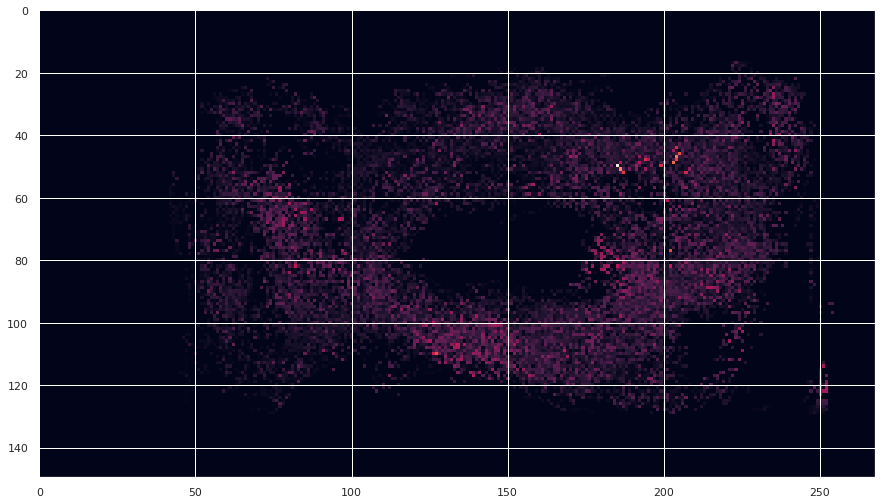

In [6]:
#Visualizamos nuestros datos (FP,FV,FA).
import os
capa = 3
videos = os.listdir('/content/drive/My Drive/ImaClasificacionAlcohol/capa1')
image = np.load("/content/drive/My Drive/ImaClasificacionAlcohol/capa"+str(capa)+"/"+videos[0])
plt.figure(figsize=(15,15))
plt.imshow(image)
print(image.shape)

In [7]:
videos_interes = []
for i in videos:
  part = i.split('_')
  if ((part[1] != '075POS') and (part[1] != '075PRE')):
    videos_interes.append(i)
print(len(videos_interes))

225


In [8]:
datos = []
labels = []


for i in videos:
  particion = i.split('_')
  if ((particion[1] != '075POS') and (particion[1] != '075PRE')):
    image1 = np.load("/content/drive/My Drive/ImaClasificacionAlcohol/capa1/"+str(i))
    image2 = np.load("/content/drive/My Drive/ImaClasificacionAlcohol/capa2/"+str(i))
    image3 = np.load("/content/drive/My Drive/ImaClasificacionAlcohol/capa3/"+str(i))
    dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
    dato[:,:,0] = image1
    dato[:,:,1] = image2
    dato[:,:,2] = image3
    datos.append(dato)

    if (particion[1]=='0'):
      labels.append(0)
    elif (particion[1] == '0Estres'):
      labels.append(1)
    elif (particion[1] == '025'):
      labels.append(2)
    elif (particion[1] == '05'):
      labels.append(3)
    elif (particion[1] == '075'):
      labels.append(4)
    elif (particion[1] == '1'):
      labels.append(5)
  

datos = np.array(datos)
labels = np.array(labels)
print(datos.shape)
print(labels.shape)

(225, 150, 268, 3)
(225,)


In [9]:
#Ahora procedemos a partir los datos
X_train, X_test, y_train, y_test = train_test_split(datos, labels, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(157, 150, 268, 3) (68, 150, 268, 3) (157,) (68,)


# 2 convolucionales + 2POOL+ 3Full

In [ ]:
#Primera arquitectura Lenet (2conv+2pool+3full) para clasificación
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(6, 5, activation='relu')(entrada)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
x = tf.keras.layers.Dense(84, activation='relu')(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(entrada, x)

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 264, 6)       456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 132, 6)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 130, 16)       880       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 65, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
nepochs = 30
tam_lote = 128
history= model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/30
2/2 [==============================] - 2s 855ms/step - loss: 2.8271 - sparse_categorical_accuracy: 0.2229 - val_loss: 6.8522 - val_sparse_categorical_accuracy: 0.3824
Epoch 2/30
2/2 [==============================] - 2s 775ms/step - loss: 5.0937 - sparse_categorical_accuracy: 0.4013 - val_loss: 5.4673 - val_sparse_categorical_accuracy: 0.3971
Epoch 3/30
2/2 [==============================] - 2s 769ms/step - loss: 3.9904 - sparse_categorical_accuracy: 0.4395 - val_loss: 2.7091 - val_sparse_categorical_accuracy: 0.4265
Epoch 4/30
2/2 [==============================] - 2s 787ms/step - loss: 1.9450 - sparse_categorical_accuracy: 0.4650 - val_loss: 2.1603 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/30
2/2 [==============================] - 2s 783ms/step - loss: 1.2195 - sparse_categorical_accuracy: 0.6624 - val_loss: 2.1697 - val_sparse_categorical_accuracy: 0.5735
Epoch 6/30
2/2 [==============================] - 2s 792ms/step - loss: 1.1547 - sparse_categorical_accuracy: 

1.0 0.8676470518112183


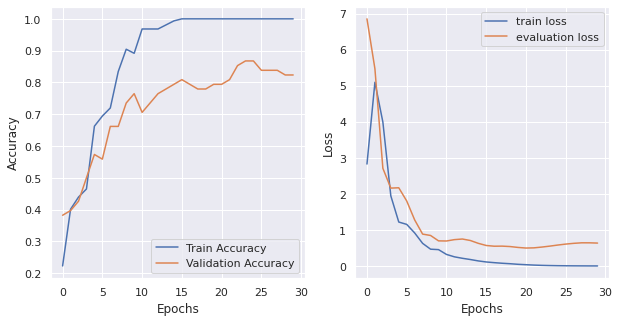

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
#Aqui guardamos los modelos propuestos LENET-5
model.save('/content/drive/My Drive/Colab Notebooks/Lenet5_AlcoholFinal.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Lenet5_AlcoholFinal.h5')

68


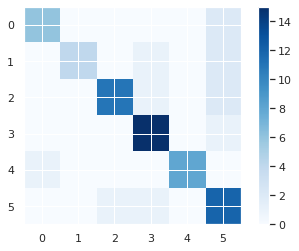

In [ ]:
prediccion = model.predict(X_test)
labels_pre = []
for i in prediccion:
  max = 0
  label = 0
  count = 0
  for k in i:
    if (k > max):
      max = k
      label = count
    count += 1
  labels_pre.append(label)    
print(len(labels_pre))
cm_test = confusion_matrix(y_test, labels_pre, labels=[0, 1, 2, 3, 4, 5])
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

# 4 Convolucionales + 2Pool+ 3Full

In [10]:
#Segunda arquitectura (4conv + 2Pool + 2Full)
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 67, 64)       

In [11]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [12]:
#Entrenamiento
nepochs = 50
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 1s 749ms/step - loss: 2.3673 - sparse_categorical_accuracy: 0.1720 - val_loss: 1.5027 - val_sparse_categorical_accuracy: 0.4118
Epoch 2/50
2/2 [==============================] - 0s 178ms/step - loss: 1.5591 - sparse_categorical_accuracy: 0.3631 - val_loss: 1.4166 - val_sparse_categorical_accuracy: 0.3529
Epoch 3/50
2/2 [==============================] - 0s 173ms/step - loss: 1.3487 - sparse_categorical_accuracy: 0.3949 - val_loss: 1.2469 - val_sparse_categorical_accuracy: 0.4559
Epoch 4/50
2/2 [==============================] - 0s 172ms/step - loss: 1.1366 - sparse_categorical_accuracy: 0.4968 - val_loss: 1.3208 - val_sparse_categorical_accuracy: 0.4706
Epoch 5/50
2/2 [==============================] - 0s 174ms/step - loss: 1.1099 - sparse_categorical_accuracy: 0.5032 - val_loss: 1.1793 - val_sparse_categorical_accuracy: 0.4853
Epoch 6/50
2/2 [==============================] - 0s 174ms/step - loss: 0.9921 - sparse_categorical_accuracy: 

0.993630588054657 0.8970588445663452


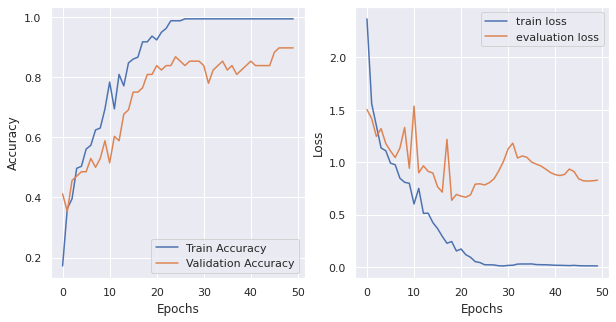

In [13]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [15]:
model.save('/content/drive/My Drive/Colab Notebooks/4ConvAlcohol.h5')

68


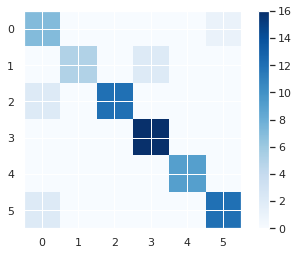

In [14]:
prediccion = model.predict(X_test)
labels_pre = []
for i in prediccion:
  max = 0
  label = 0
  count = 0
  for k in i:
    if (k > max):
      max = k
      label = count
    count += 1
  labels_pre.append(label)    
print(len(labels_pre))
cm_test = confusion_matrix(y_test, labels_pre, labels=[0, 1, 2, 3, 4, 5])
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

# 6 convolucionales + 3Pool + 2Full

In [16]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(84, activation='relu')(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 67, 64)       

In [17]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [18]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))


Epoch 1/70
2/2 [==============================] - 1s 607ms/step - loss: 2.0262 - sparse_categorical_accuracy: 0.1656 - val_loss: 1.6317 - val_sparse_categorical_accuracy: 0.4559
Epoch 2/70
2/2 [==============================] - 0s 220ms/step - loss: 1.5287 - sparse_categorical_accuracy: 0.4268 - val_loss: 1.3475 - val_sparse_categorical_accuracy: 0.6176
Epoch 3/70
2/2 [==============================] - 0s 217ms/step - loss: 1.2328 - sparse_categorical_accuracy: 0.6306 - val_loss: 1.2185 - val_sparse_categorical_accuracy: 0.5441
Epoch 4/70
2/2 [==============================] - 0s 221ms/step - loss: 1.0319 - sparse_categorical_accuracy: 0.5860 - val_loss: 0.8918 - val_sparse_categorical_accuracy: 0.6765
Epoch 5/70
2/2 [==============================] - 0s 220ms/step - loss: 0.7442 - sparse_categorical_accuracy: 0.7452 - val_loss: 0.8500 - val_sparse_categorical_accuracy: 0.6471
Epoch 6/70
2/2 [==============================] - 0s 221ms/step - loss: 0.5910 - sparse_categorical_accuracy: 

1.0 0.8529411554336548


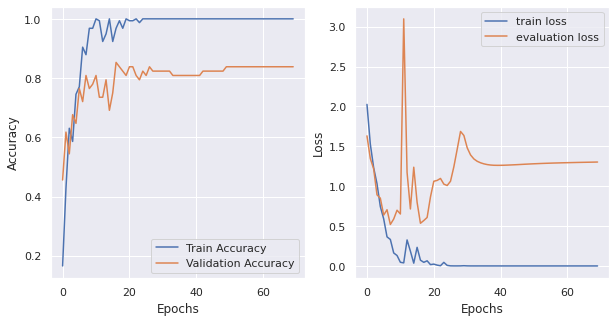

In [19]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [20]:
model.save('/content/drive/My Drive/Colab Notebooks/6ConvAlcohol.h5')

68


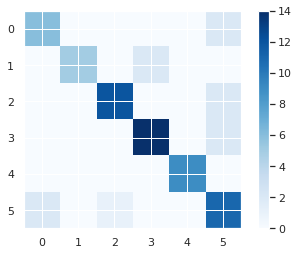

In [21]:
prediccion = model.predict(X_test)
labels_pre = []
for i in prediccion:
  max = 0
  label = 0
  count = 0
  for k in i:
    if (k > max):
      max = k
      label = count
    count += 1
  labels_pre.append(label)    
print(len(labels_pre))
cm_test = confusion_matrix(y_test, labels_pre, labels=[0, 1, 2, 3, 4, 5])
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [ ]:
cm_test

# 8 convolucionales + 4Pool + 2Full

In [ ]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 67, 64)       

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 30
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/30
2/2 [==============================] - 1s 339ms/step - loss: 1.8089 - sparse_categorical_accuracy: 0.2229 - val_loss: 1.5957 - val_sparse_categorical_accuracy: 0.3824
Epoch 2/30
2/2 [==============================] - 0s 136ms/step - loss: 1.6663 - sparse_categorical_accuracy: 0.3121 - val_loss: 1.4233 - val_sparse_categorical_accuracy: 0.3824
Epoch 3/30
2/2 [==============================] - 0s 140ms/step - loss: 1.4447 - sparse_categorical_accuracy: 0.3949 - val_loss: 1.3096 - val_sparse_categorical_accuracy: 0.4412
Epoch 4/30
2/2 [==============================] - 0s 137ms/step - loss: 1.2140 - sparse_categorical_accuracy: 0.5287 - val_loss: 1.2769 - val_sparse_categorical_accuracy: 0.4853
Epoch 5/30
2/2 [==============================] - 0s 137ms/step - loss: 1.1669 - sparse_categorical_accuracy: 0.5732 - val_loss: 1.1375 - val_sparse_categorical_accuracy: 0.6471
Epoch 6/30
2/2 [==============================] - 0s 137ms/step - loss: 1.0215 - sparse_categorical_accuracy: 

1.0 0.7941176295280457


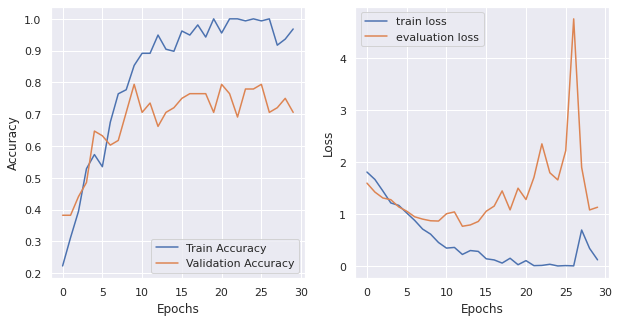

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/8ConvAlcohol.h5')

68


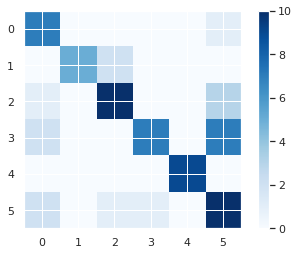

In [ ]:
prediccion = model.predict(X_test)
labels_pre = []
for i in prediccion:
  max = 0
  label = 0
  count = 0
  for k in i:
    if (k > max):
      max = k
      label = count
    count += 1
  labels_pre.append(label)    
print(len(labels_pre))
cm_test = confusion_matrix(y_test, labels_pre, labels=[0, 1, 2, 3, 4, 5])
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

# VGG16

In [ ]:
from keras.applications import vgg16
model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(150,268,3), pooling=None, classes=6)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 268, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 268, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 134, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 134, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 134, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 67, 128)       0     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
2/2 [==============================] - 3s 1s/step - loss: 5.1637 - sparse_categorical_accuracy: 0.1783 - val_loss: 1.8058 - val_sparse_categorical_accuracy: 0.1471
Epoch 2/70
2/2 [==============================] - 1s 399ms/step - loss: 1.7974 - sparse_categorical_accuracy: 0.1911 - val_loss: 1.8045 - val_sparse_categorical_accuracy: 0.3971
Epoch 3/70
2/2 [==============================] - 1s 398ms/step - loss: 1.7730 - sparse_categorical_accuracy: 0.3694 - val_loss: 1.6474 - val_sparse_categorical_accuracy: 0.3971
Epoch 4/70
2/2 [==============================] - 1s 399ms/step - loss: 4.3891 - sparse_categorical_accuracy: 0.3567 - val_loss: 1.6073 - val_sparse_categorical_accuracy: 0.2941
Epoch 5/70
2/2 [==============================] - 1s 397ms/step - loss: 1.6526 - sparse_categorical_accuracy: 0.2803 - val_loss: 1.7412 - val_sparse_categorical_accuracy: 0.2647
Epoch 6/70
2/2 [==============================] - 1s 398ms/step - loss: 1.7666 - sparse_categorical_accuracy: 0.2

1.0 0.7058823704719543


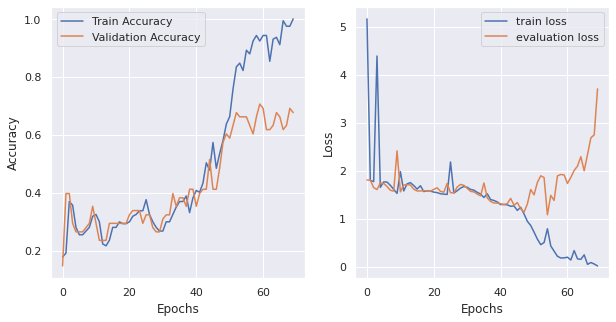

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/VGG16Alcohol.h5')

68


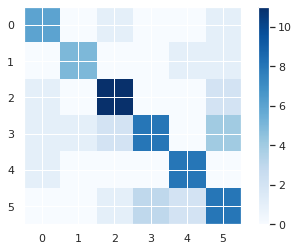

In [ ]:
prediccion = model.predict(X_test)
labels_pre = []
for i in prediccion:
  max = 0
  label = 0
  count = 0
  for k in i:
    if (k > max):
      max = k
      label = count
    count += 1
  labels_pre.append(label)    
print(len(labels_pre))
cm_test = confusion_matrix(y_test, labels_pre, labels=[0, 1, 2, 3, 4, 5])
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

# VGG19

In [ ]:
from keras.applications import vgg19
model = vgg19.VGG19(include_top=True, weights=None, input_tensor=None, input_shape=(150,268,3), pooling=None, classes=6)

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 268, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 268, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 134, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 134, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 134, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 67, 128)       0     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
2/2 [==============================] - 1s 571ms/step - loss: 1.7893 - sparse_categorical_accuracy: 0.2102 - val_loss: 1.7091 - val_sparse_categorical_accuracy: 0.3382
Epoch 2/70
2/2 [==============================] - 1s 468ms/step - loss: 1.6559 - sparse_categorical_accuracy: 0.2930 - val_loss: 1.6442 - val_sparse_categorical_accuracy: 0.3971
Epoch 3/70
2/2 [==============================] - 1s 468ms/step - loss: 1.4328 - sparse_categorical_accuracy: 0.4076 - val_loss: 1.4085 - val_sparse_categorical_accuracy: 0.3529
Epoch 4/70
2/2 [==============================] - 1s 465ms/step - loss: 1.3632 - sparse_categorical_accuracy: 0.4777 - val_loss: 1.3887 - val_sparse_categorical_accuracy: 0.4853
Epoch 5/70
2/2 [==============================] - 1s 467ms/step - loss: 1.3146 - sparse_categorical_accuracy: 0.4650 - val_loss: 1.3029 - val_sparse_categorical_accuracy: 0.4853
Epoch 6/70
2/2 [==============================] - 1s 468ms/step - loss: 1.1225 - sparse_categorical_accuracy: 

1.0 0.720588207244873


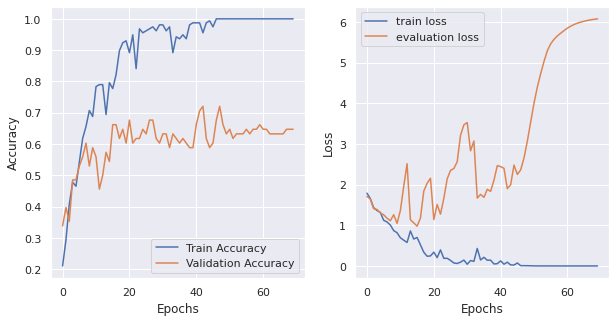

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

68


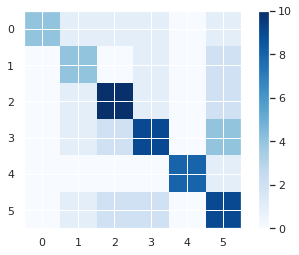

In [ ]:
prediccion = model.predict(X_test)
labels_pre = []
for i in prediccion:
  max = 0
  label = 0
  count = 0
  for k in i:
    if (k > max):
      max = k
      label = count
    count += 1
  labels_pre.append(label)    
print(len(labels_pre))
cm_test = confusion_matrix(y_test, labels_pre, labels=[0, 1, 2, 3, 4, 5])
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/VGG19Alcohol.h5')

# Etanol 075 Pos vs Pre

In [ ]:
datos = []
labels = []


for i in videos:
  particion = i.split('_')
  if ((particion[1] == '075POS') or (particion[1] == '075PRE')):
    image1 = np.load("/content/drive/My Drive/ImaClasificacionAlcohol/capa1/"+str(i))
    image2 = np.load("/content/drive/My Drive/ImaClasificacionAlcohol/capa2/"+str(i))
    image3 = np.load("/content/drive/My Drive/ImaClasificacionAlcohol/capa3/"+str(i))
    dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
    dato[:,:,0] = image1
    dato[:,:,1] = image2
    dato[:,:,2] = image3
    datos.append(dato)

    if (particion[1]=='075PRE'):
      labels.append(0)
    elif (particion[1] == '075POS'):
      labels.append(1)
  

datos = np.array(datos)
labels = np.array(labels)
print(datos.shape)
print(labels.shape)

(60, 150, 268, 3)
(60,)


In [ ]:
#Ahora procedemos a partir los datos
X_train, X_test, y_train, y_test = train_test_split(datos, labels, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42, 150, 268, 3) (18, 150, 268, 3) (42,) (18,)


In [ ]:
INIT_LR = 1e-3
epochs = 6
batch_size = 64

entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(6, 5, activation='relu')(entrada)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
x = tf.keras.layers.Dense(84, activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)
model = tf.keras.Model(entrada, x)